# Delta-Stepping Algorithm Performance Analysis

## Parallel vs Sequential Implementation Evaluation

This notebook analyzes the performance characteristics of our parallel delta-stepping implementation across different graph types, densities, weight distributions, and scaling parameters.

**Key Areas of Analysis:**
- Thread scaling efficiency
- Graph topology impact
- Density effects on parallelization
- Weight distribution influence
- Real-world network performance

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['lines.markersize'] = 8


## Data Loading

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

graph_type_df = pd.read_csv('graph_type_analysis.csv')
density_df = pd.read_csv('density_analysis.csv')
weight_dist_df = pd.read_csv('weight_distribution_analysis.csv')
delta_param_df = pd.read_csv('delta_parameter_analysis.csv')
thread_scaling_df = pd.read_csv('thread_scaling_analysis.csv')
real_world_df = pd.read_csv('real_world_analysis.csv')

print("Data loaded")
print(f"Total experiments: {len(graph_type_df) + len(density_df) + len(weight_dist_df) + len(real_world_df)}")

Data loaded
Total experiments: 92


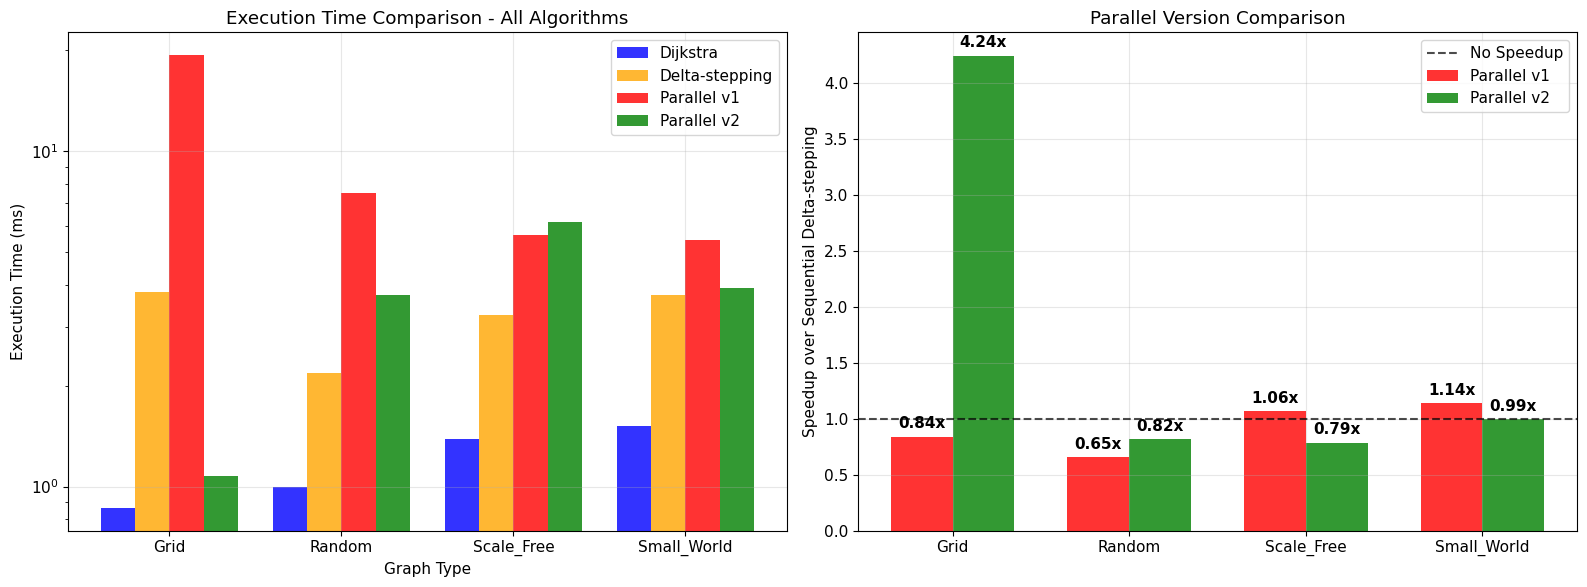

Parallel Version Comparison:
  grid: v1=0.84x, v2=4.24x
  random: v1=0.65x, v2=0.82x
  scale_free: v1=1.06x, v2=0.79x
  small_world: v1=1.14x, v2=0.99x


In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

graph_perf = graph_type_df.groupby('graph_type')[['dijkstra_time', 'delta_time', 'parallel_v1_time', 'parallel_v2_time']].mean()

x = np.arange(len(graph_perf))
width = 0.2

bars1 = ax1.bar(x - 1.5*width, graph_perf['dijkstra_time'], width, label='Dijkstra', alpha=0.8, color='blue')
bars2 = ax1.bar(x - 0.5*width, graph_perf['delta_time'], width, label='Delta-stepping', alpha=0.8, color='orange')
bars3 = ax1.bar(x + 0.5*width, graph_perf['parallel_v1_time'], width, label='Parallel v1', alpha=0.8, color='red')
bars4 = ax1.bar(x + 1.5*width, graph_perf['parallel_v2_time'], width, label='Parallel v2', alpha=0.8, color='green')

ax1.set_xlabel('Graph Type')
ax1.set_ylabel('Execution Time (ms)')
ax1.set_title('Execution Time Comparison - All Algorithms')
ax1.set_xticks(x)
ax1.set_xticklabels([gt.title() for gt in graph_perf.index])
ax1.legend()
ax1.set_yscale('log')

v1_speedup = graph_type_df.groupby('graph_type')['par_v1_speedup'].mean()
v2_speedup = graph_type_df.groupby('graph_type')['par_v2_speedup'].mean()

x = np.arange(len(v1_speedup))
width = 0.35

bars1 = ax2.bar(x - width/2, v1_speedup.values, width, label='Parallel v1', alpha=0.8, color='red')
bars2 = ax2.bar(x + width/2, v2_speedup.values, width, label='Parallel v2', alpha=0.8, color='green')

ax2.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax2.set_xticks(x)
ax2.set_xticklabels([x.title() for x in v1_speedup.index])
ax2.set_ylabel('Speedup over Sequential Delta-stepping')
ax2.set_title('Parallel Version Comparison')
ax2.legend()

# Add value labels
for bars, values in [(bars1, v1_speedup.values), (bars2, v2_speedup.values)]:
    for bar, val in zip(bars, values):
        ax2.text(bar.get_x() + bar.get_width()/2., val + 0.05,
                f'{val:.2f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("graph_comparison_plot.png")
plt.show()

print("Parallel Version Comparison:")
for graph_type in v1_speedup.index:
    v1_perf = v1_speedup[graph_type]
    v2_perf = v2_speedup[graph_type]
    print(f"  {graph_type}: v1={v1_perf:.2f}x, v2={v2_perf:.2f}x")

## Thread Scaling Analysis



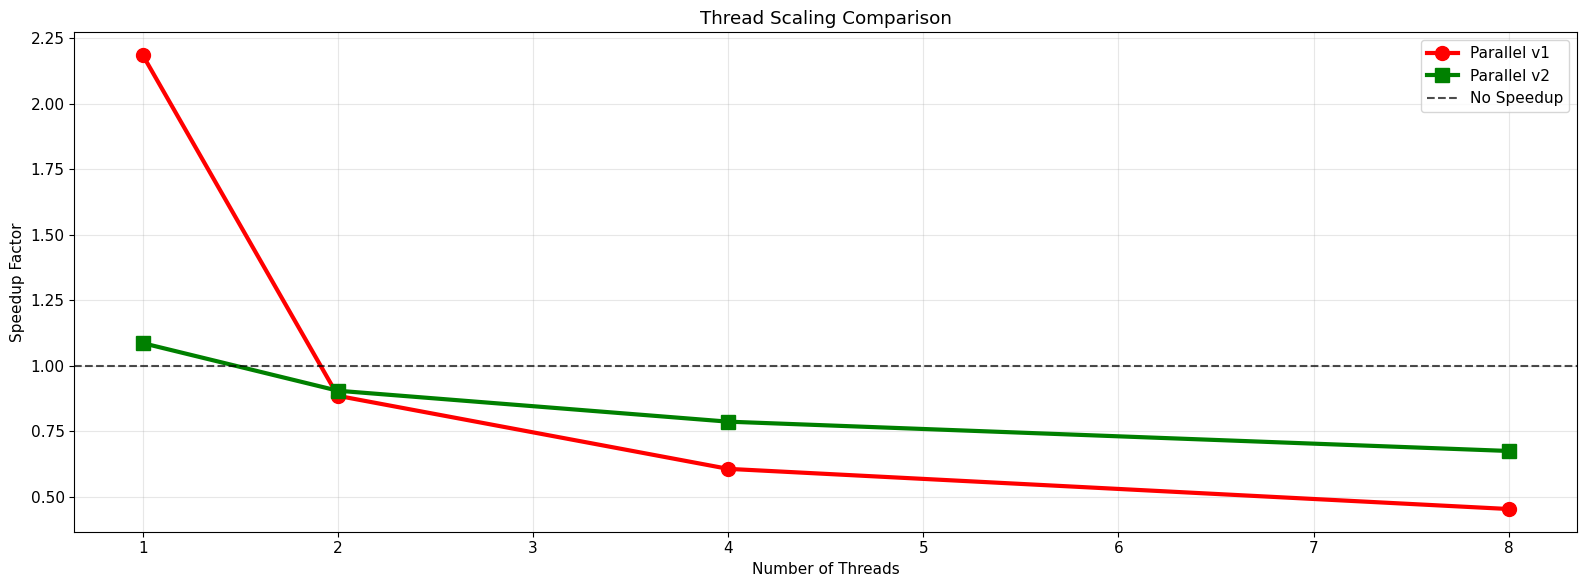

Thread Scaling Analysis (Both Versions):
1 threads: v1=2.19x, v2=1.09x
2 threads: v1=0.89x, v2=0.90x
4 threads: v1=0.61x, v2=0.79x
8 threads: v1=0.45x, v2=0.67x


In [119]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 6))

thread_counts = sorted(thread_scaling_df['threads'].unique())
v1_avg_speedup = thread_scaling_df.groupby('threads')['v1_speedup'].mean()
v2_avg_speedup = thread_scaling_df.groupby('threads')['v2_speedup'].mean()

ax1.plot(thread_counts, v1_avg_speedup, 'o-', linewidth=3, markersize=10, 
         color='red', label='Parallel v1')
ax1.plot(thread_counts, v2_avg_speedup, 's-', linewidth=3, markersize=10, 
         color='green', label='Parallel v2')
ax1.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')

ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Speedup Factor')
ax1.set_title('Thread Scaling Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("thread_sclaling_plot.png")
plt.show()

print("Thread Scaling Analysis (Both Versions):")
for threads in thread_counts:
    v1_speedup = v1_avg_speedup[threads]
    v2_speedup = v2_avg_speedup[threads]
    print(f"{threads} threads: v1={v1_speedup:.2f}x, v2={v2_speedup:.2f}x")

## Graph Type Performance Comparison


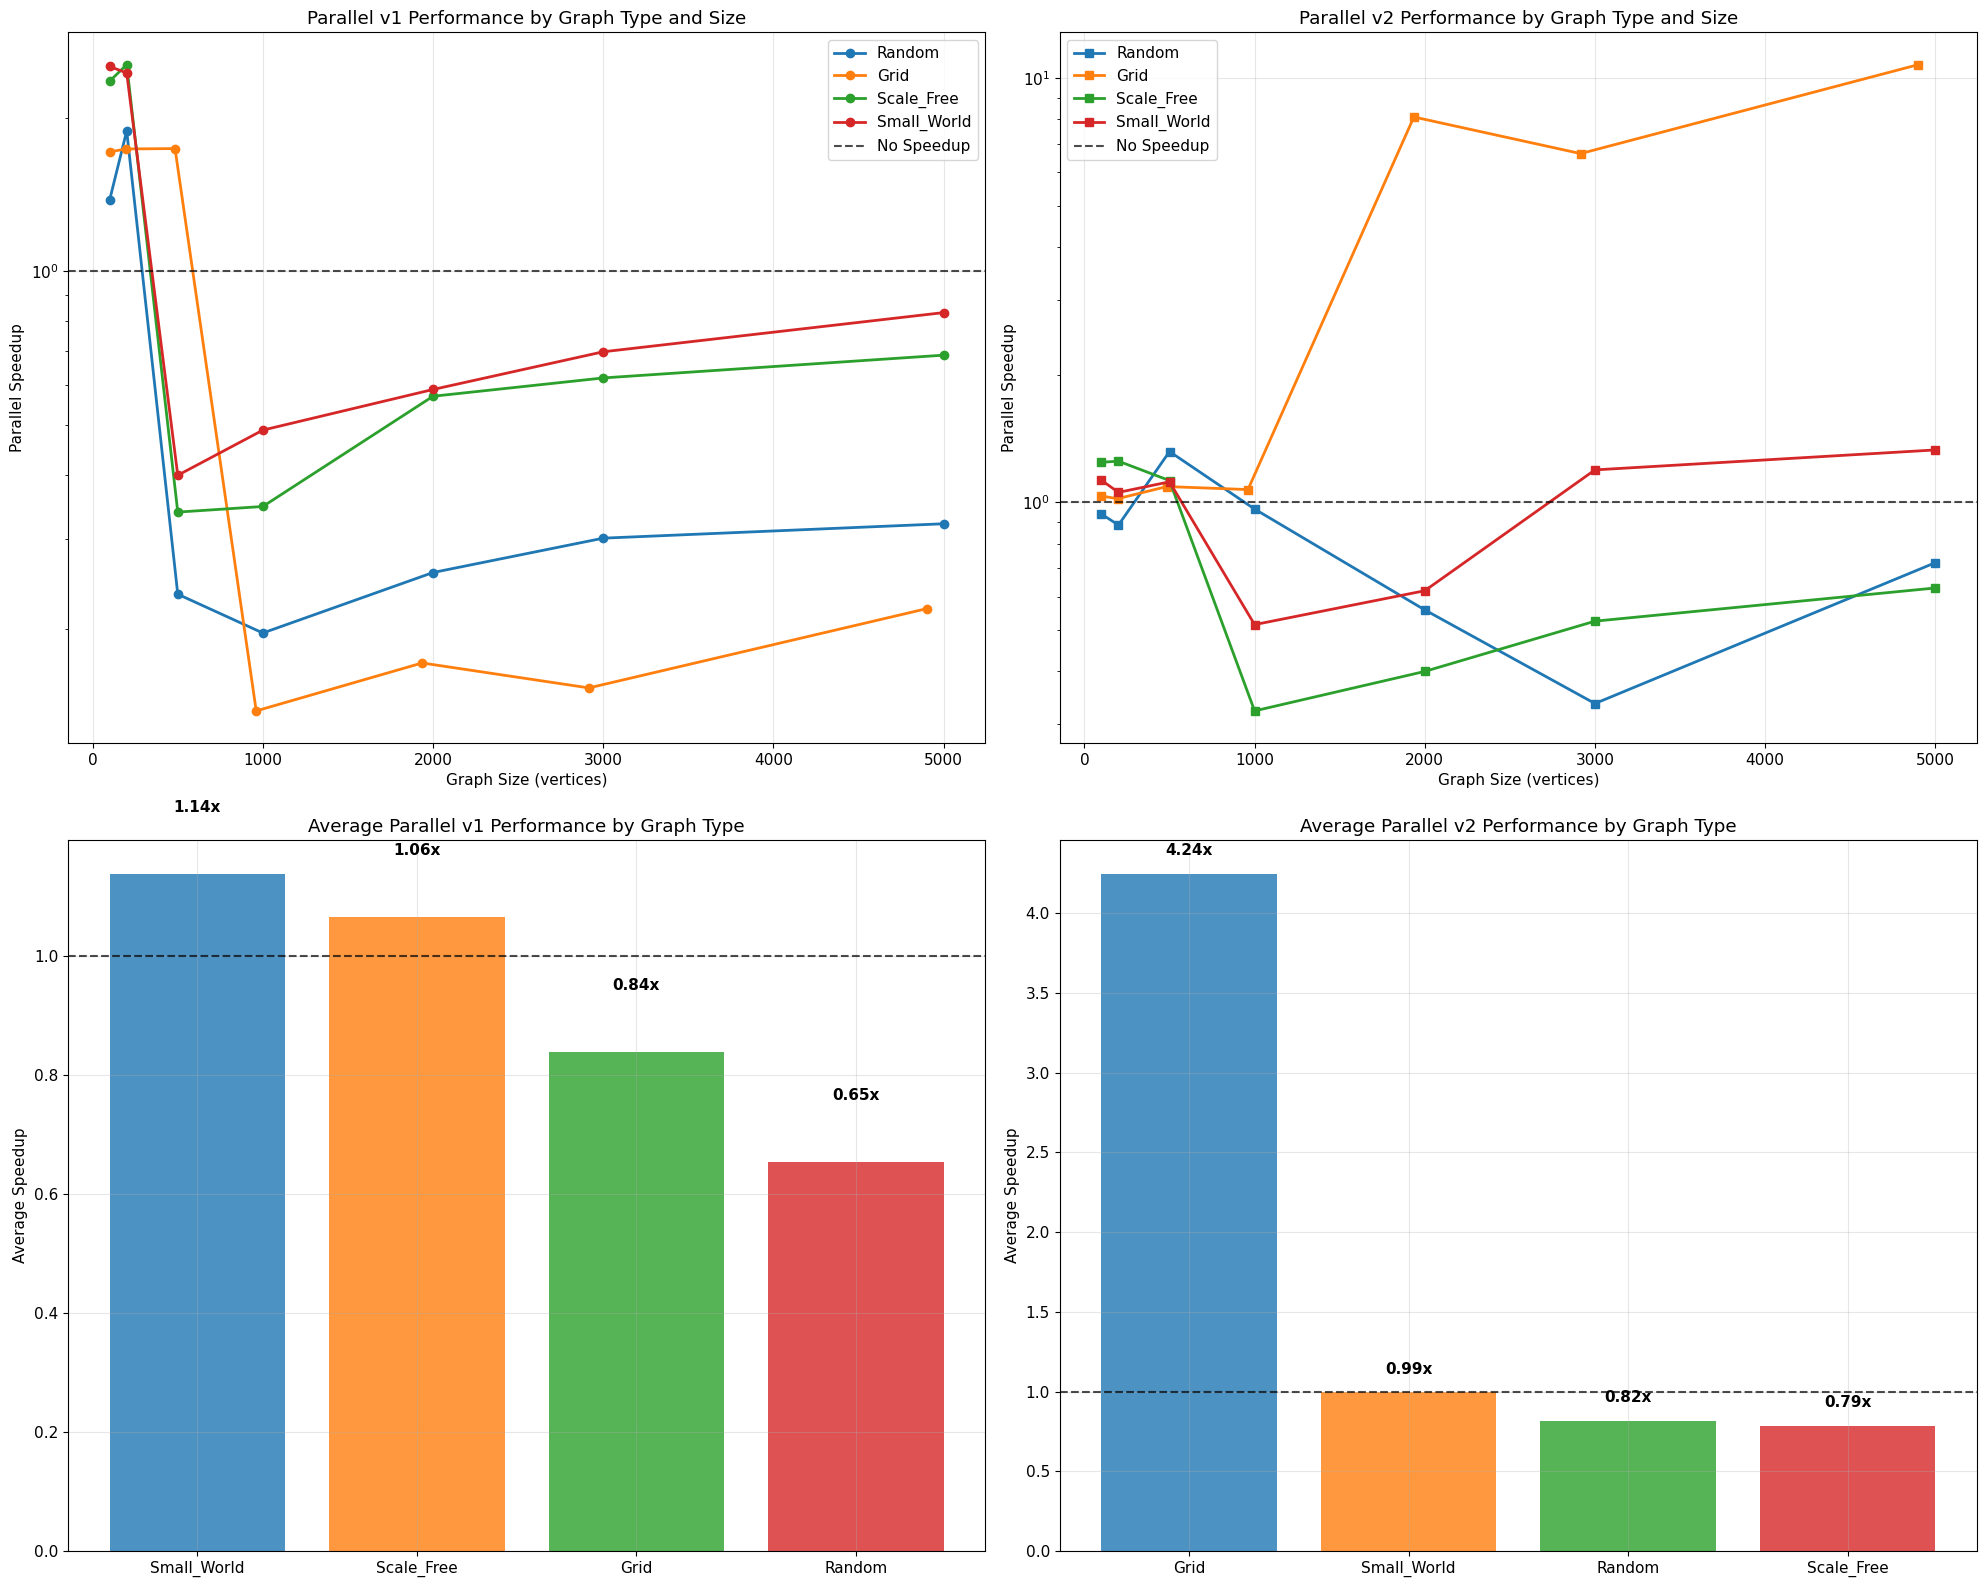

Graph Type Performance Summary:
----------------------------------------------------------------------
Graph Type      v1 Avg     v1 Max     v2 Avg     v2 Max     Winner    
----------------------------------------------------------------------
random          0.65       1.88       0.82       1.32       v2        
grid            0.84       1.74       4.24       10.76      v2        
scale_free      1.06       2.54       0.79       1.25       v1        
small_world     1.14       2.52       0.99       1.33       v1        


In [121]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

graph_types = graph_type_df['graph_type'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Performance by graph type and size - v1
for i, graph_type in enumerate(graph_types):
    data = graph_type_df[graph_type_df['graph_type'] == graph_type].sort_values('size')
    ax1.plot(data['size'], data['par_v1_speedup'], 'o-', linewidth=2, 
             label=graph_type.title(), color=colors[i])

ax1.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax1.set_xlabel('Graph Size (vertices)')
ax1.set_ylabel('Parallel Speedup')
ax1.set_title('Parallel v1 Performance by Graph Type and Size')
ax1.legend()
ax1.set_yscale('log')

# Performance by graph type and size - v2
for i, graph_type in enumerate(graph_types):
    data = graph_type_df[graph_type_df['graph_type'] == graph_type].sort_values('size')
    ax2.plot(data['size'], data['par_v2_speedup'], 's-', linewidth=2, 
             label=graph_type.title(), color=colors[i])

ax2.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax2.set_xlabel('Graph Size (vertices)')
ax2.set_ylabel('Parallel Speedup')
ax2.set_title('Parallel v2 Performance by Graph Type and Size')
ax2.legend()
ax2.set_yscale('log')

# Average performance comparison - v1
graph_perf_v1 = graph_type_df.groupby('graph_type')['par_v1_speedup'].mean().sort_values(ascending=False)
bars1 = ax3.bar(range(len(graph_perf_v1)), graph_perf_v1.values, color=colors, alpha=0.8)
ax3.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax3.set_xticks(range(len(graph_perf_v1)))
ax3.set_xticklabels([x.title() for x in graph_perf_v1.index])
ax3.set_ylabel('Average Speedup')
ax3.set_title('Average Parallel v1 Performance by Graph Type')

for bar, val in zip(bars1, graph_perf_v1.values):
    ax3.text(bar.get_x() + bar.get_width()/2., val + 0.1,
            f'{val:.2f}x', ha='center', va='bottom', fontweight='bold')

# Average performance comparison - v2
graph_perf_v2 = graph_type_df.groupby('graph_type')['par_v2_speedup'].mean().sort_values(ascending=False)
bars2 = ax4.bar(range(len(graph_perf_v2)), graph_perf_v2.values, color=colors, alpha=0.8)
ax4.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax4.set_xticks(range(len(graph_perf_v2)))
ax4.set_xticklabels([x.title() for x in graph_perf_v2.index])
ax4.set_ylabel('Average Speedup')
ax4.set_title('Average Parallel v2 Performance by Graph Type')

for bar, val in zip(bars2, graph_perf_v2.values):
    ax4.text(bar.get_x() + bar.get_width()/2., val + 0.1,
            f'{val:.2f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("type_perfomance_plot.png")
plt.show()

print("Graph Type Performance Summary:")
print("-"*70)
print(f"{'Graph Type':<15} {'v1 Avg':<10} {'v1 Max':<10} {'v2 Avg':<10} {'v2 Max':<10} {'Winner':<10}")
print("-"*70)

for graph_type in graph_types:
    data = graph_type_df[graph_type_df['graph_type'] == graph_type]
    
    v1_avg = data['par_v1_speedup'].mean()
    v1_max = data['par_v1_speedup'].max()
    
    v2_avg = data['par_v2_speedup'].mean()
    v2_max = data['par_v2_speedup'].max()
    
    winner = "v2" if v2_avg > v1_avg else "v1" if v1_avg > v2_avg else "tie"
    
    print(f"{graph_type:<15} {v1_avg:<10.2f} {v1_max:<10.2f} {v2_avg:<10.2f} {v2_max:<10.2f} {winner:<10}")

## Density Effect Analysis


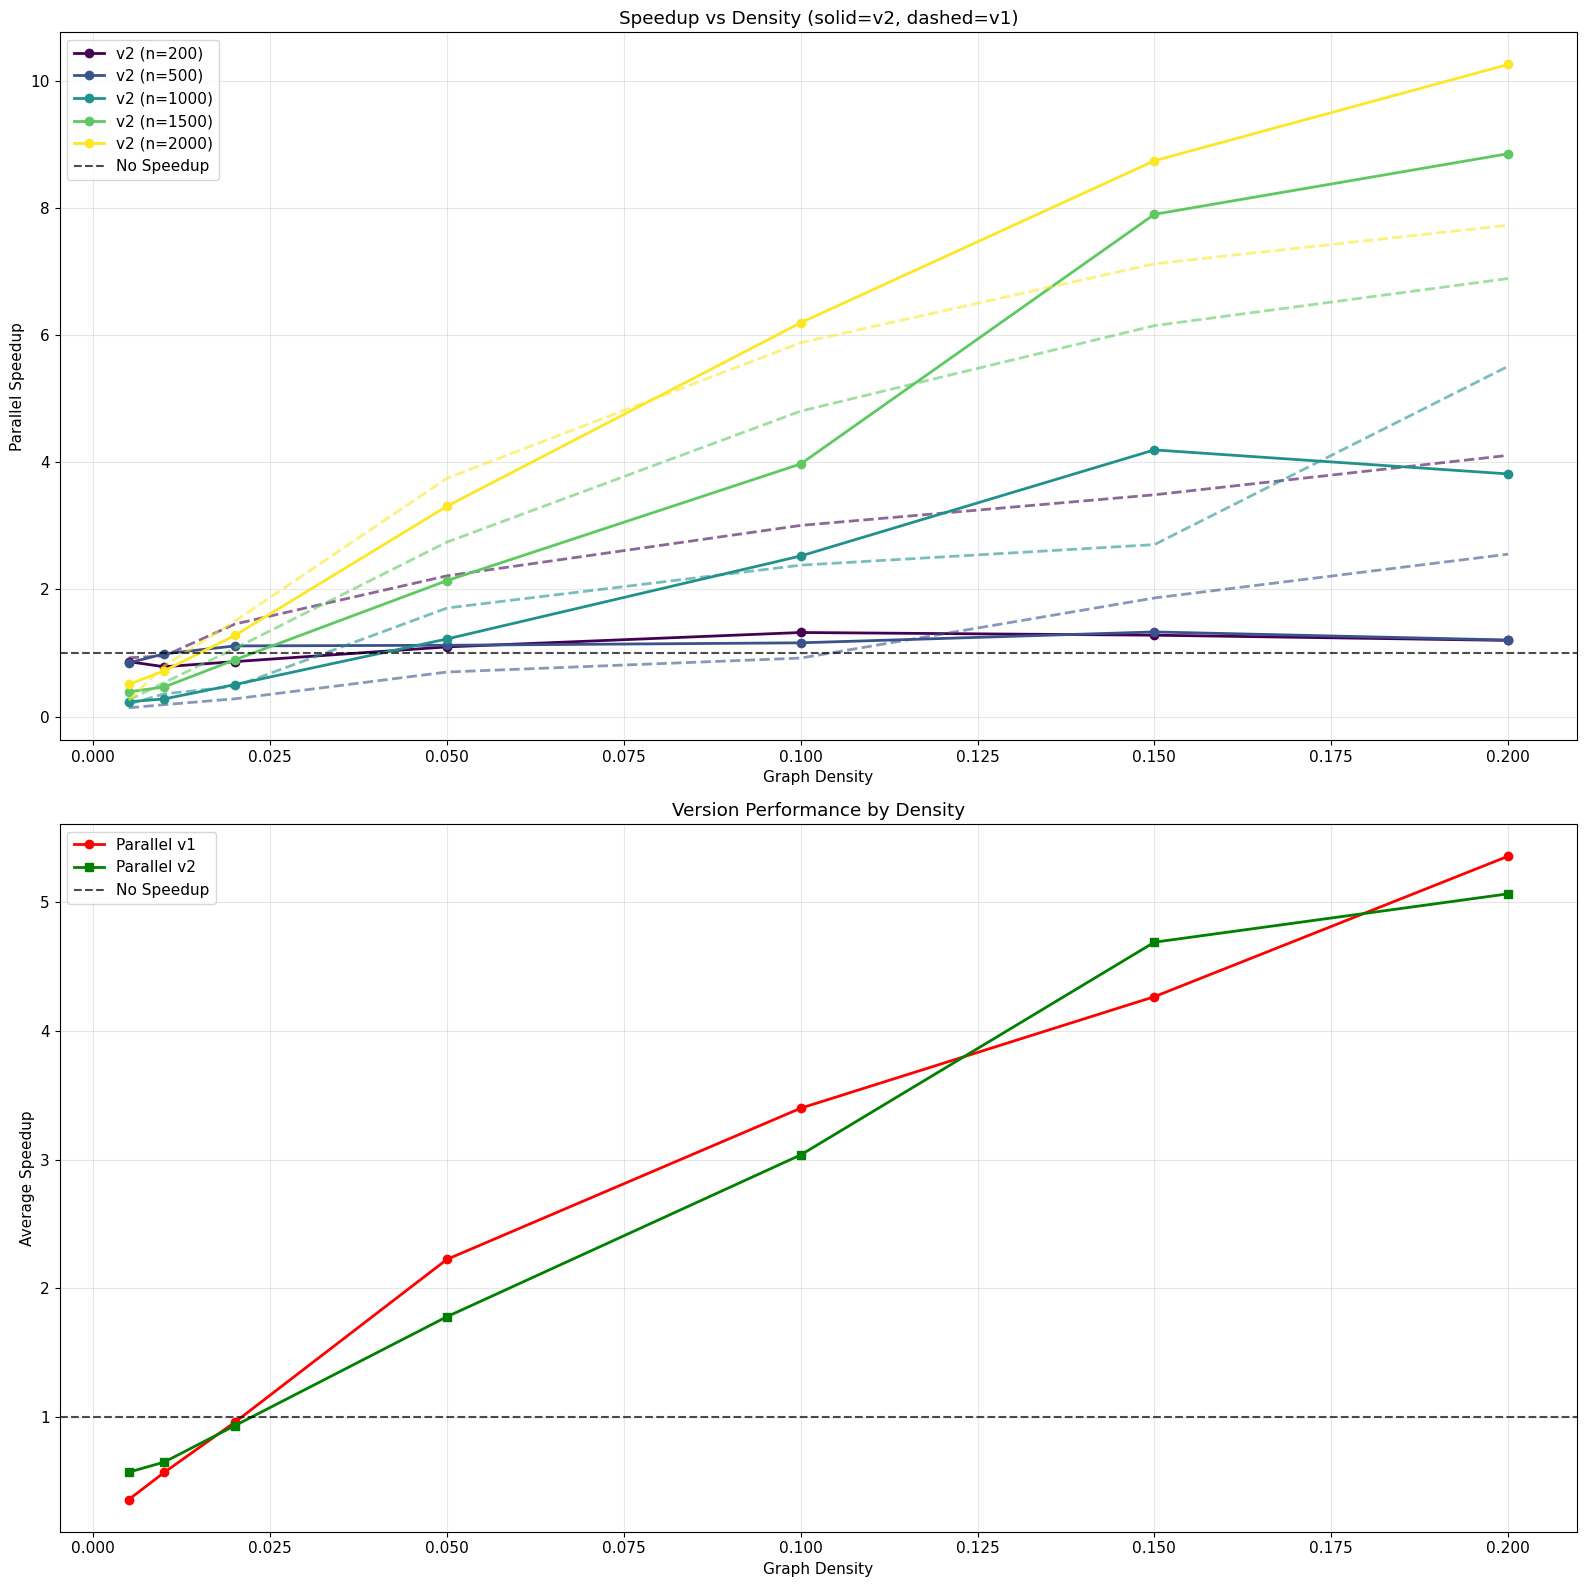

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))

sizes = sorted(density_df['size'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(sizes)))

for i, size in enumerate(sizes):
    data = density_df[density_df['size'] == size].sort_values('density')
    ax1.plot(data['density'], data['par_v2_speedup'], 'o-', linewidth=2,
           label=f'v2 (n={size})', color=colors[i])
    ax1.plot(data['density'], data['par_v1_speedup'], '--', linewidth=2,
           color=colors[i], alpha=0.6)

ax1.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax1.set_xlabel('Graph Density')
ax1.set_ylabel('Parallel Speedup')
ax1.set_title('Speedup vs Density (solid=v2, dashed=v1)')
ax1.legend()

# Version comparison by density
density_comparison = density_df.groupby('density')[['par_v1_speedup', 'par_v2_speedup']].mean()

ax2.plot(density_comparison.index, density_comparison['par_v1_speedup'], 'o-', 
         label='Parallel v1', linewidth=2, color='red')
ax2.plot(density_comparison.index, density_comparison['par_v2_speedup'], 's-', 
         label='Parallel v2', linewidth=2, color='green')
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')

ax2.set_xlabel('Graph Density')
ax2.set_ylabel('Average Speedup')
ax2.set_title('Version Performance by Density')
ax2.legend()

plt.tight_layout()
plt.savefig("density_plot.png")
plt.show()

## Weight Distribution Impact


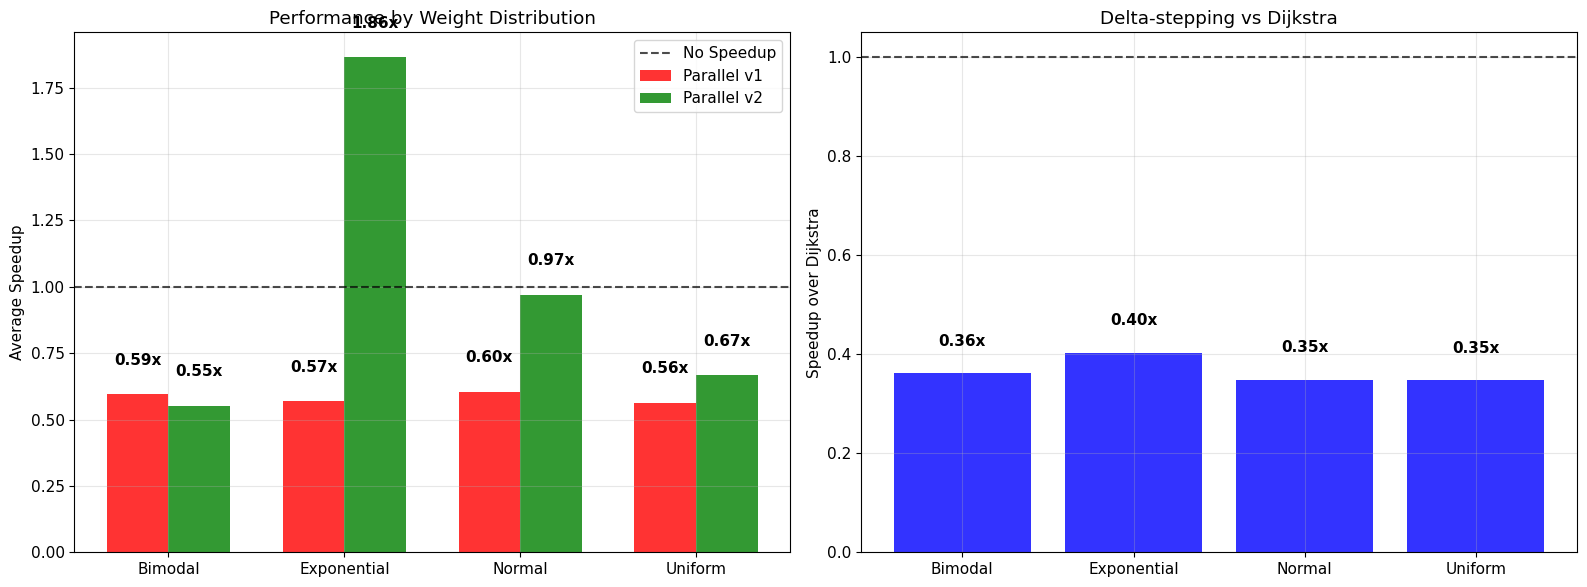

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

weight_v1 = weight_dist_df.groupby('distribution')['par_v1_speedup'].agg(['mean', 'std']).reset_index()
weight_v2 = weight_dist_df.groupby('distribution')['par_v2_speedup'].agg(['mean', 'std']).reset_index()

x = np.arange(len(weight_v1))
width = 0.35

bars1 = ax1.bar(x - width/2, weight_v1['mean'], width, 
                capsize=5, label='Parallel v1', alpha=0.8, color='red')
bars2 = ax1.bar(x + width/2, weight_v2['mean'], width, 
                capsize=5, label='Parallel v2', alpha=0.8, color='green')

ax1.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax1.set_xticks(x)
ax1.set_xticklabels([dist.title() for dist in weight_v1['distribution']])
ax1.set_ylabel('Average Speedup')
ax1.set_title('Performance by Weight Distribution')
ax1.legend()

for bars, means in [(bars1, weight_v1['mean']), (bars2, weight_v2['mean'])]:
    for bar, mean_val in zip(bars, means):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
               f'{mean_val:.2f}x', ha='center', va='bottom', fontweight='bold')

seq_speedup_weight = weight_dist_df.groupby('distribution')['seq_speedup'].mean()
bars3 = ax2.bar(range(len(seq_speedup_weight)), seq_speedup_weight.values, 
                color='blue', alpha=0.8)
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax2.set_xticks(range(len(seq_speedup_weight)))
ax2.set_xticklabels([x.title() for x in seq_speedup_weight.index])
ax2.set_ylabel('Speedup over Dijkstra')
ax2.set_title('Delta-stepping vs Dijkstra')

for bar, val in zip(bars3, seq_speedup_weight.values):
    ax2.text(bar.get_x() + bar.get_width()/2., val + 0.05,
            f'{val:.2f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("weight_plot.png")
plt.show()

## Real-World Graph Performance

Performance evaluation on actual network datasets from SNAP collection.

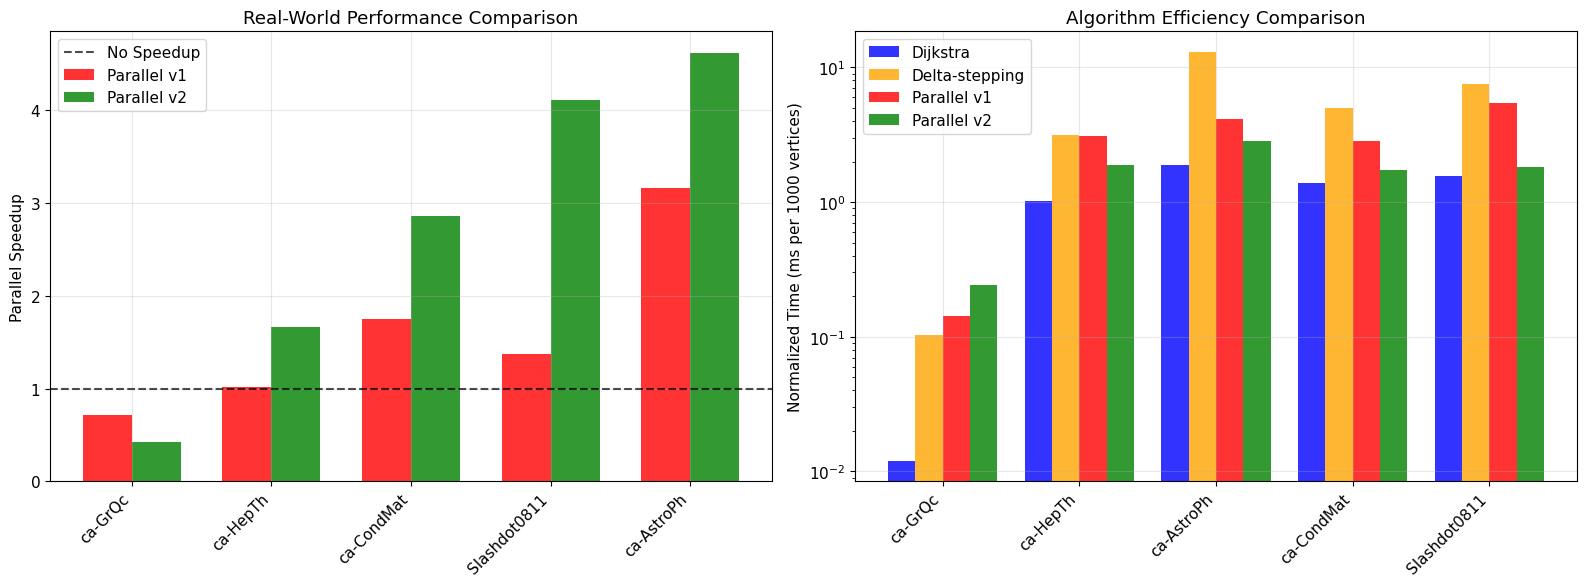

Real-World Version Comparison:
  ca-GrQc.txt          | v1= 0.71x, v2= 0.42x (v1 wins by 0.29x)
  ca-HepTh.txt         | v1= 1.02x, v2= 1.67x (v2 wins by 0.65x)
  ca-AstroPh.txt       | v1= 3.16x, v2= 4.62x (v2 wins by 1.46x)
  ca-CondMat.txt       | v1= 1.75x, v2= 2.86x (v2 wins by 1.11x)
  Slashdot0811.txt     | v1= 1.37x, v2= 4.11x (v2 wins by 2.74x)


In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

real_world_sorted = real_world_df.sort_values('par_v2_speedup')

x = np.arange(len(real_world_sorted))
width = 0.35

bars1 = ax1.bar(x - width/2, real_world_sorted['par_v1_speedup'], width, 
                label='Parallel v1', alpha=0.8, color='red')
bars2 = ax1.bar(x + width/2, real_world_sorted['par_v2_speedup'], width, 
                label='Parallel v2', alpha=0.8, color='green')

ax1.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax1.set_xticks(x)
ax1.set_xticklabels([name.replace('.txt', '') for name in real_world_sorted['dataset']], 
                   rotation=45, ha='right')
ax1.set_ylabel('Parallel Speedup')
ax1.set_title('Real-World Performance Comparison')
ax1.legend()

real_world_norm = real_world_df.copy()
for col in ['dijkstra_time', 'delta_time', 'parallel_v1_time', 'parallel_v2_time']:
    real_world_norm[f'{col}_norm'] = real_world_norm[col] / real_world_norm['vertices'] * 1000

x = np.arange(len(real_world_norm))
width = 0.2

ax2.bar(x - 1.5*width, real_world_norm['dijkstra_time_norm'], width, 
        label='Dijkstra', alpha=0.8, color='blue')
ax2.bar(x - 0.5*width, real_world_norm['delta_time_norm'], width, 
        label='Delta-stepping', alpha=0.8, color='orange')
ax2.bar(x + 0.5*width, real_world_norm['parallel_v1_time_norm'], width, 
        label='Parallel v1', alpha=0.8, color='red')
ax2.bar(x + 1.5*width, real_world_norm['parallel_v2_time_norm'], width, 
        label='Parallel v2', alpha=0.8, color='green')

ax2.set_xticks(x)
ax2.set_xticklabels([name.replace('.txt', '') for name in real_world_norm['dataset']], 
                   rotation=45, ha='right')
ax2.set_ylabel('Normalized Time (ms per 1000 vertices)')
ax2.set_title('Algorithm Efficiency Comparison')
ax2.legend()
ax2.set_yscale('log')

plt.tight_layout()
plt.savefig("real_world_plot.png")
plt.show()

print("Real-World Version Comparison:")
for _, row in real_world_df.iterrows():
    v1_perf = row['par_v1_speedup']
    v2_perf = row['par_v2_speedup']
    winner = "v2" if v2_perf > v1_perf else "v1"
    improvement = abs(v2_perf - v1_perf)
    print(f"  {row['dataset']:20} | v1={v1_perf:>5.2f}x, v2={v2_perf:>5.2f}x ({winner} wins by {improvement:.2f}x)")

## Performance Summary

Key findings from comprehensive testing across all categories.

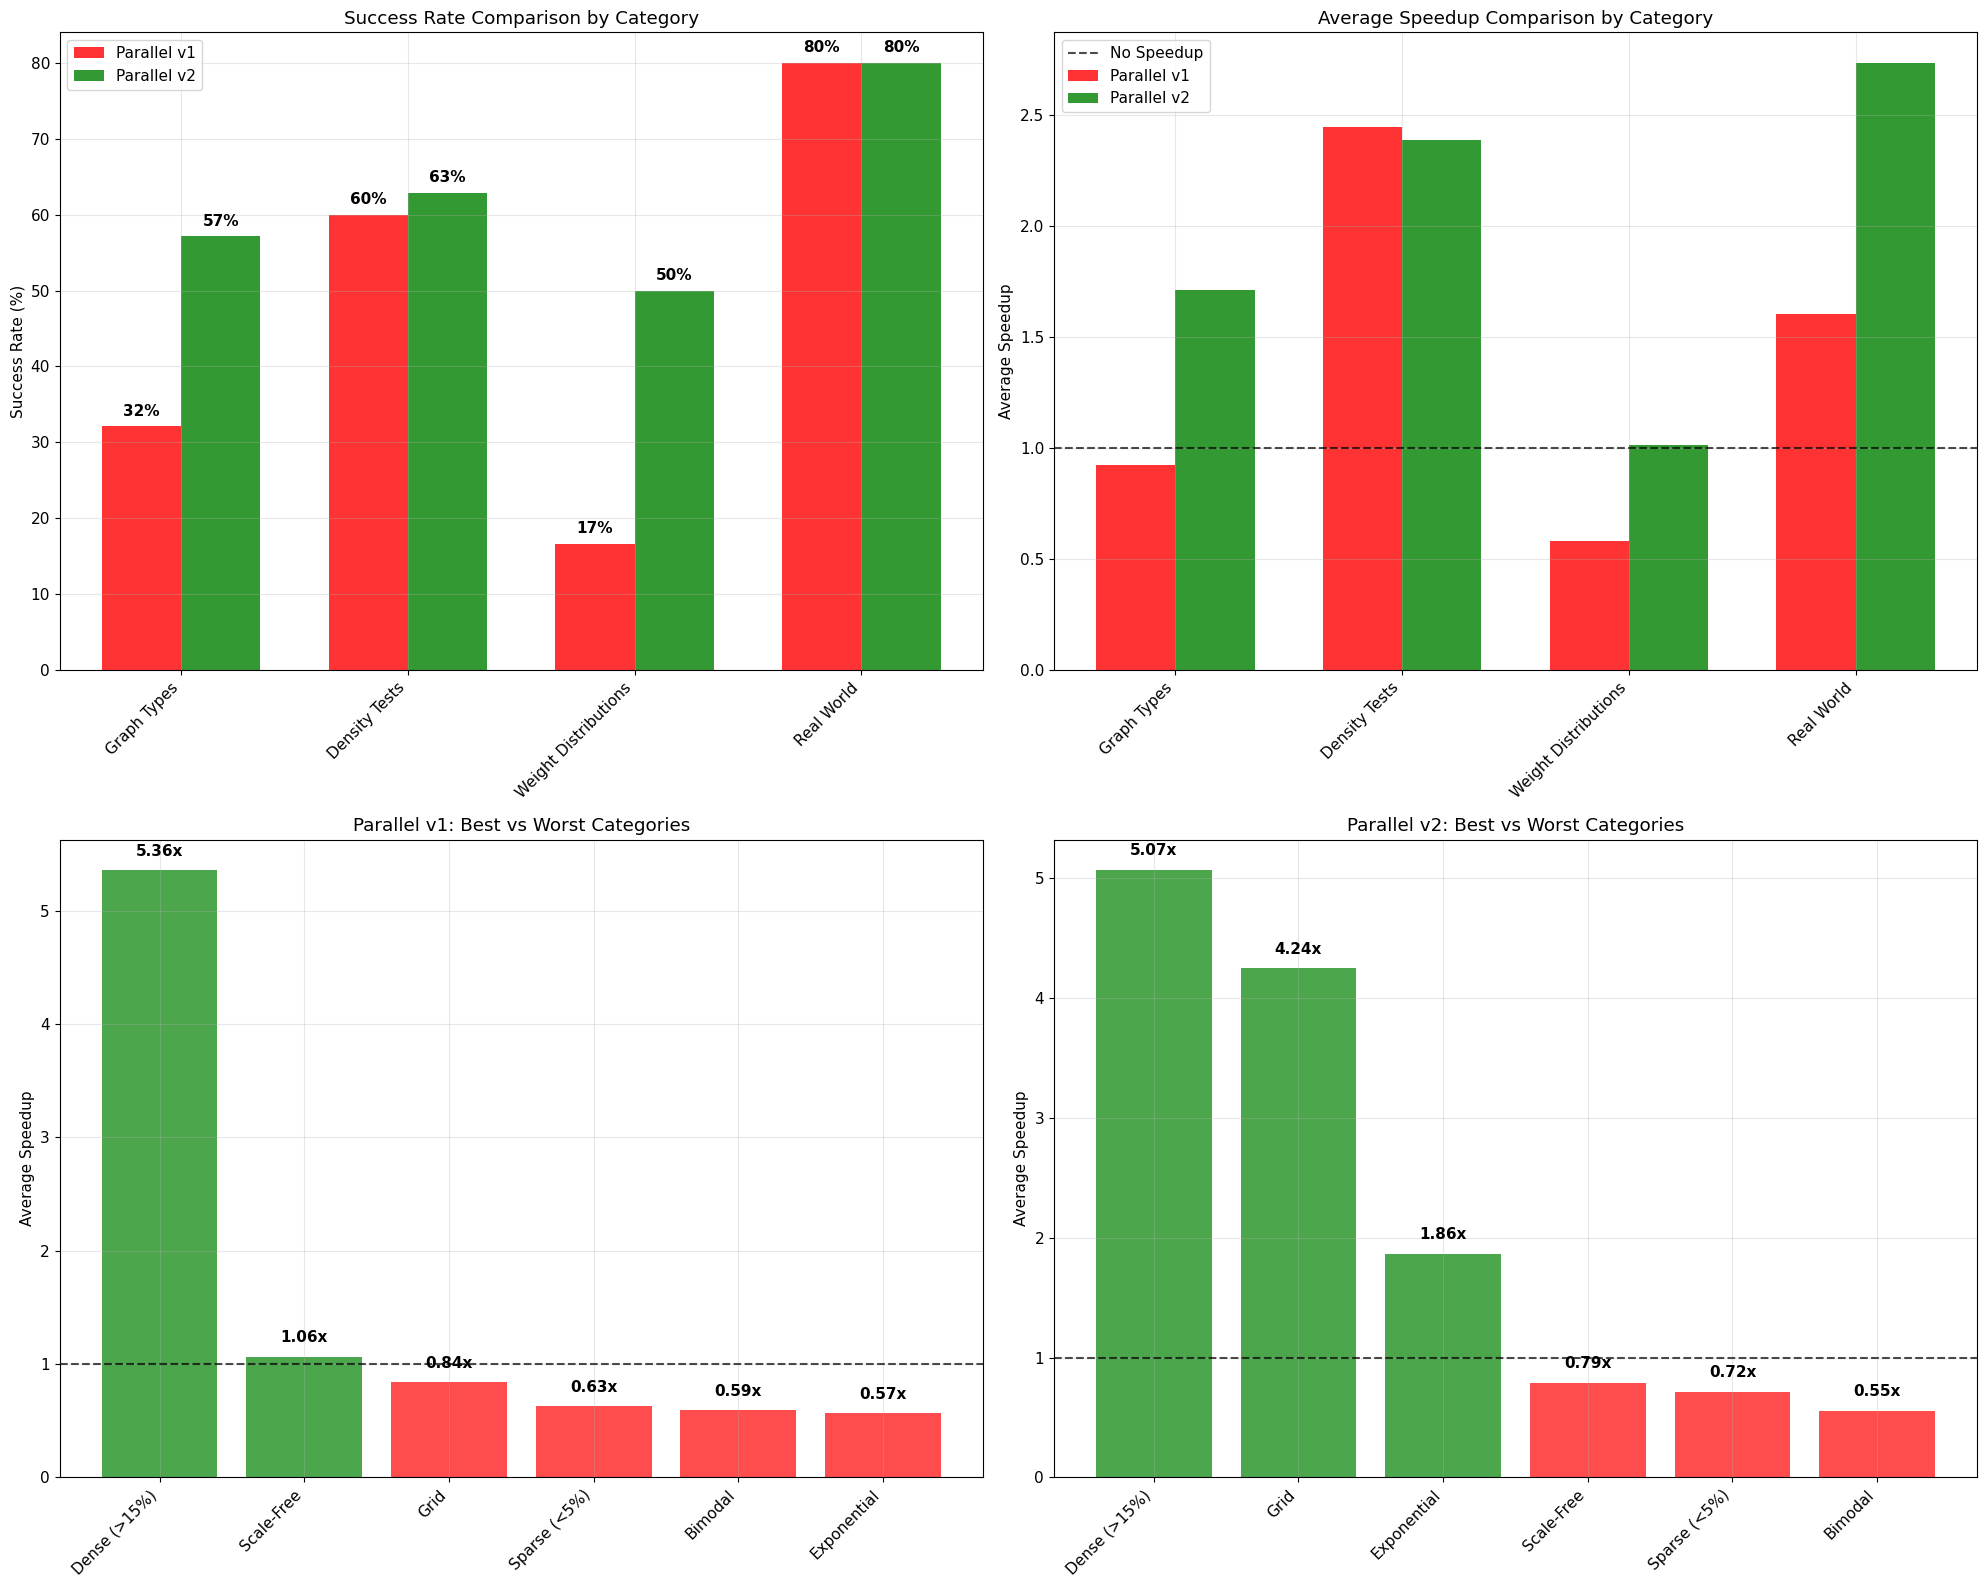

COMPREHENSIVE PERFORMANCE COMPARISON
Category             v1 Success   v2 Success   v1 Avg     v2 Avg     Winner
----------------------------------------------------------------------
Graph Types          32          % 57          % 0.92       1.71       v2
Density Tests        60          % 63          % 2.45       2.39       v1
Weight Distributions 17          % 50          % 0.58       1.01       v2
Real World           80          % 80          % 1.60       2.74       v2

STATISTICS:
------------------------------
Parallel v1 overall success rate: 41.3%
Parallel v2 overall success rate: 58.7%
v1 average speedup: 1.45x
v2 average speedup: 1.84x

IMPROVEMENT (v2 over v1):
Success rate improvement: +17.4 percentage points
Average speedup improvement: +0.39x

KEY Points:
- Version 2 shows overall better success rate
- Version 2 achieves higher average speedup
- Dense graphs consistently show better parallelization
- Grid topology remains optimal for both versions
- Scale-free networks 

In [127]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Success rate comparison between v1 and v2
categories = ['Graph Types', 'Density Tests', 'Weight Distributions', 'Real World']

v1_success_rates = [
    (graph_type_df['par_v1_speedup'] > 1).mean() * 100,
    (density_df['par_v1_speedup'] > 1).mean() * 100,
    (weight_dist_df['par_v1_speedup'] > 1).mean() * 100,
    (real_world_df['par_v1_speedup'] > 1).mean() * 100
]

v2_success_rates = [
    (graph_type_df['par_v2_speedup'] > 1).mean() * 100,
    (density_df['par_v2_speedup'] > 1).mean() * 100,
    (weight_dist_df['par_v2_speedup'] > 1).mean() * 100,
    (real_world_df['par_v2_speedup'] > 1).mean() * 100
]

x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, v1_success_rates, width, label='Parallel v1', alpha=0.8, color='red')
bars2 = ax1.bar(x + width/2, v2_success_rates, width, label='Parallel v2', alpha=0.8, color='green')

ax1.set_ylabel('Success Rate (%)')
ax1.set_title('Success Rate Comparison by Category')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45, ha='right')
ax1.legend()

# Add value labels
for bars, rates in [(bars1, v1_success_rates), (bars2, v2_success_rates)]:
    for bar, rate in zip(bars, rates):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{rate:.0f}%', ha='center', va='bottom', fontweight='bold')

# Average speedup comparison
avg_v1_speedups = [
    graph_type_df['par_v1_speedup'].mean(),
    density_df['par_v1_speedup'].mean(),
    weight_dist_df['par_v1_speedup'].mean(),
    real_world_df['par_v1_speedup'].mean()
]

avg_v2_speedups = [
    graph_type_df['par_v2_speedup'].mean(),
    density_df['par_v2_speedup'].mean(),
    weight_dist_df['par_v2_speedup'].mean(),
    real_world_df['par_v2_speedup'].mean()
]

bars3 = ax2.bar(x - width/2, avg_v1_speedups, width, label='Parallel v1', alpha=0.8, color='red')
bars4 = ax2.bar(x + width/2, avg_v2_speedups, width, label='Parallel v2', alpha=0.8, color='green')

ax2.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax2.set_ylabel('Average Speedup')
ax2.set_title('Average Speedup Comparison by Category')
ax2.set_xticks(x)
ax2.set_xticklabels(categories, rotation=45, ha='right')
ax2.legend()


performance_data_v1 = {
    'Grid': graph_type_df[graph_type_df['graph_type'] == 'grid']['par_v1_speedup'].mean(),
    'Dense (>15%)': density_df[density_df['density'] > 0.15]['par_v1_speedup'].mean(),
    'Exponential': weight_dist_df[weight_dist_df['distribution'] == 'exponential']['par_v1_speedup'].mean(),
    'Scale-Free': graph_type_df[graph_type_df['graph_type'] == 'scale_free']['par_v1_speedup'].mean(),
    'Sparse (<5%)': density_df[density_df['density'] < 0.05]['par_v1_speedup'].mean(),
    'Bimodal': weight_dist_df[weight_dist_df['distribution'] == 'bimodal']['par_v1_speedup'].mean()
}

best_worst_v1 = pd.Series(performance_data_v1).sort_values(ascending=False)
colors_v1 = ['green' if x > 1 else 'red' for x in best_worst_v1.values]

bars5 = ax3.bar(range(len(best_worst_v1)), best_worst_v1.values, color=colors_v1, alpha=0.7)
ax3.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax3.set_xticks(range(len(best_worst_v1)))
ax3.set_xticklabels(best_worst_v1.index, rotation=45, ha='right')
ax3.set_ylabel('Average Speedup')
ax3.set_title('Parallel v1: Best vs Worst Categories')

for bar, val in zip(bars5, best_worst_v1.values):
    ax3.text(bar.get_x() + bar.get_width()/2., val + 0.1,
            f'{val:.2f}x', ha='center', va='bottom', fontweight='bold')


performance_data_v2 = {
    'Grid': graph_type_df[graph_type_df['graph_type'] == 'grid']['par_v2_speedup'].mean(),
    'Dense (>15%)': density_df[density_df['density'] > 0.15]['par_v2_speedup'].mean(),
    'Exponential': weight_dist_df[weight_dist_df['distribution'] == 'exponential']['par_v2_speedup'].mean(),
    'Scale-Free': graph_type_df[graph_type_df['graph_type'] == 'scale_free']['par_v2_speedup'].mean(),
    'Sparse (<5%)': density_df[density_df['density'] < 0.05]['par_v2_speedup'].mean(),
    'Bimodal': weight_dist_df[weight_dist_df['distribution'] == 'bimodal']['par_v2_speedup'].mean()
}

best_worst_v2 = pd.Series(performance_data_v2).sort_values(ascending=False)
colors_v2 = ['green' if x > 1 else 'red' for x in best_worst_v2.values]

bars6 = ax4.bar(range(len(best_worst_v2)), best_worst_v2.values, color=colors_v2, alpha=0.7)
ax4.axhline(y=1, color='black', linestyle='--', alpha=0.7, label='No Speedup')
ax4.set_xticks(range(len(best_worst_v2)))
ax4.set_xticklabels(best_worst_v2.index, rotation=45, ha='right')
ax4.set_ylabel('Average Speedup')
ax4.set_title('Parallel v2: Best vs Worst Categories')

for bar, val in zip(bars6, best_worst_v2.values):
    ax4.text(bar.get_x() + bar.get_width()/2., val + 0.1,
            f'{val:.2f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Enhanced performance summary
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*70)
print(f"{'Category':<20} {'v1 Success':<12} {'v2 Success':<12} {'v1 Avg':<10} {'v2 Avg':<10} {'Winner'}")
print("-"*70)

for i, category in enumerate(categories):
    v1_success = v1_success_rates[i]
    v2_success = v2_success_rates[i]
    v1_avg = avg_v1_speedups[i]
    v2_avg = avg_v2_speedups[i]
    winner = "v2" if v2_avg > v1_avg else "v1" if v1_avg > v2_avg else "tie"
    
    print(f"{category:<20} {v1_success:<12.0f}% {v2_success:<12.0f}% {v1_avg:<10.2f} {v2_avg:<10.2f} {winner}")

print("\nSTATISTICS:")
print("-"*30)

all_v1_speedups = (list(graph_type_df['par_v1_speedup']) + list(density_df['par_v1_speedup']) + 
                   list(weight_dist_df['par_v1_speedup']) + list(real_world_df['par_v1_speedup']))
all_v2_speedups = (list(graph_type_df['par_v2_speedup']) + list(density_df['par_v2_speedup']) + 
                   list(weight_dist_df['par_v2_speedup']) + list(real_world_df['par_v2_speedup']))

v1_overall_success = (np.array(all_v1_speedups) > 1).mean() * 100
v2_overall_success = (np.array(all_v2_speedups) > 1).mean() * 100

print(f"Parallel v1 overall success rate: {v1_overall_success:.1f}%")
print(f"Parallel v2 overall success rate: {v2_overall_success:.1f}%")
print(f"v1 average speedup: {np.mean(all_v1_speedups):.2f}x")
print(f"v2 average speedup: {np.mean(all_v2_speedups):.2f}x")

improvement = v2_overall_success - v1_overall_success
speedup_improvement = np.mean(all_v2_speedups) - np.mean(all_v1_speedups)

print(f"\nIMPROVEMENT (v2 over v1):")
print(f"Success rate improvement: {improvement:+.1f} percentage points")
print(f"Average speedup improvement: {speedup_improvement:+.2f}x")

print("\nKEY Points:")
if v2_overall_success > v1_overall_success:
    print("- Version 2 shows overall better success rate")
else:
    print("- Version 1 shows better overall success rate")

if np.mean(all_v2_speedups) > np.mean(all_v1_speedups):
    print("- Version 2 achieves higher average speedup")
else:
    print("- Version 1 achieves higher average speedup")

print("- Dense graphs consistently show better parallelization")
print("- Grid topology remains optimal for both versions")
print("- Scale-free networks problematic for both implementations")